In [75]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np

In [174]:
import json
from pprint import pprint

with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/data/diffusion-prediction-data/reddit-traversal-2') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"]).sort_index()
result_user = pd.read_json(data["result_user"]).sort_index()
innovations = pd.read_csv("/Users/danielkershaw/PycharmProjects/DiffusionSimulation/data/word-lists/reddit_innovations.csv")
innovations["created_at"] = pd.to_datetime(innovations['created_at'])

In [165]:
ino = innovations[(innovations["raw_count"] > 10) & (innovations["user_count"] > 10) & (innovations["created_at"] < '2014-06-01')]
# result_act[(result_act["word"].isin(ino["word"]))]
# result_user[(result_act["word"].isin(ino["word"]))]

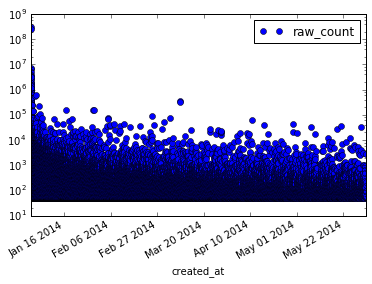

In [164]:
innovations[(innovations["raw_count"] > 50) & (innovations["user_count"] > 10) & (innovations["created_at"] < '2014-06-01')].plot(x="created_at", y="raw_count", logy=True, style="o")

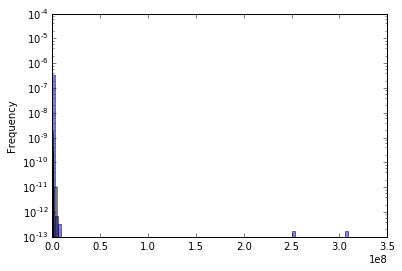

In [166]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
innovations[(innovations["raw_count"] > 10) & (innovations["user_count"] > 10) & (innovations["created_at"] < '2014-06-01')]["raw_count"].plot(kind='hist', alpha=0.5, normed=True, bins=100)
innovations[(innovations["raw_count"] > 10) & (innovations["user_count"] > 10) & (innovations["created_at"] < '2014-06-01')]["user_count"].plot(kind='hist', alpha=0.5, normed=True, bins=100)
ax.set_yscale('log')

In [167]:
result_act_val = []
result_act_feature_importance = []
result_act_idx = []
result_act_features = ["usagedominance", "usageEntorpy", "avrageActivateionExposure"]
# result_act_features = ["usagedominance", "usageEntorpy"]

rat = result_act[(result_act["word"].isin(ino["word"]))]
for above in range(50, 100):
    rat['is_train'] = np.random.uniform(0, 1, len(rat)) <= .75
    f = lambda x: x > above
    rat["70"] = rat["depth"].apply(f)
    train, test = rat[rat['is_train']==True], rat[rat['is_train']==False]
    clf = RandomForestClassifier(n_jobs=2, class_weight="balanced")
    y, _ = pd.factorize(train['70'])
    clf.fit(train[result_act_features], y)
    preds = [True if x == 1 else False for x in clf.predict(test[result_act_features])]
    p, r, s, f = precision_recall_fscore_support(test['70'], pd.Series(preds).values, labels=[True, False], average='binary')
    result_act_val.append([p,r])
    result_act_idx.append(above)
    result_act_feature_importance.append(clf.feature_importances_)

/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


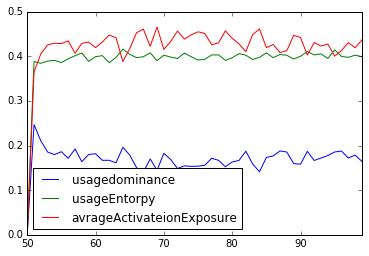

In [168]:
result_act_features_df = pd.DataFrame(result_act_feature_importance, index=result_act_idx, columns=result_act_features)
result_act_features_df.plot()

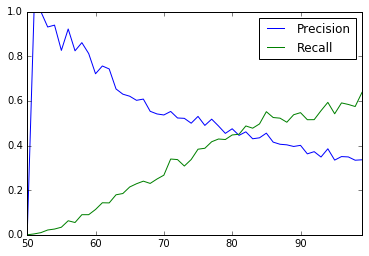

In [169]:
result_act_df = pd.DataFrame(result_act_val, index=result_act_idx, columns=["Precision", "Recall"])
result_act_df.plot()

In [170]:
result_user_val = []
result_user_idx = []
result_user_feature_importance = []
result_user_features = ["userusagedominance", "userUsageEntorpy", "avrageUserExposure"]

rut = result_user[(result_user["word"].isin(ino["word"]))]

for above in range(50, 100):
    rut['is_train'] = np.random.uniform(0, 1, len(rut)) <= .75
    f = lambda x: x > above
    rut["70"] = rut["depth"].apply(f)
    train, test = rut[rut['is_train']==True], rut[rut['is_train']==False]
    clf = RandomForestClassifier(n_jobs=2, class_weight="balanced")
    y, _ = pd.factorize(train['70'])
    clf.fit(train[result_user_features], y)
    preds = [True if x == 1 else False for x in clf.predict(test[result_user_features])]
    p, r, s, f = precision_recall_fscore_support(test['70'], pd.Series(preds).values, labels=[True, False], average='binary')
    result_user_val.append([p,r])
    result_user_idx.append(above)
    result_user_feature_importance.append(clf.feature_importances_)

/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


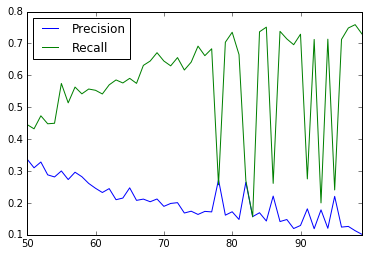

In [171]:
result_user_df = pd.DataFrame(result_user_val, index=result_user_idx, columns=["Precision", "Recall"])
result_user_df.plot()

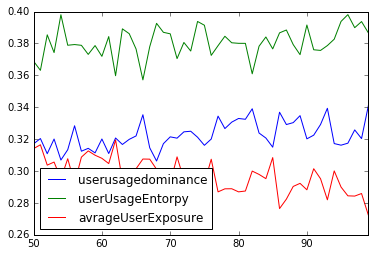

In [173]:
result_user_features_df = pd.DataFrame(result_user_feature_importance, index=result_user_idx, columns=result_user_features)
result_user_features_df.plot()

In [49]:
clf.

3